In [1]:
import matplotlib.pyplot as plt # to make plots
import numpy as np # for array manipulation and math functions
import scipy.signal as scs # for signal analysis
import glob # for finding files
import os as os
import warnings
import array as arr
from statistics import mean
from scipy import optimize
from scipy.optimize import curve_fit
# import fit models from the lmfit package
from lmfit.models import ExponentialModel, GaussianModel, PolynomialModel



def coarseBackgroundModel(x,y,deg,signal_range):
    poly_mod = PolynomialModel(deg, prefix='p1_')
    mask= ((x<signal_range[0]) | (x>signal_range[1]))
    x_ = x[mask]
    y_ = y[mask]
    p_bg = poly_mod.guess(y_, x=x_)
    mod_bg = poly_mod
    init_bg = mod_bg.eval(p_bg, x=x_)
    out_bg = mod_bg.fit(y_, p_bg, x=x_)
    return p_bg, out_bg, mod_bg
def coarseBackgroundModel2(x,y,deg,signal_range):
    poly_mod = PolynomialModel(deg, prefix='p1_')
    mask= ((((x<signal_range[0]) | (x>signal_range[1])) & ((x<signal_range[2]) | (x>signal_range[3]))) & ((x<signal_range[4]) | (x>signal_range[5])))
    x_ = x[mask]
    y_ = y[mask]
    p_bg = poly_mod.guess(y_, x=x_)
    mod_bg = poly_mod
    init_bg = mod_bg.eval(p_bg, x=x_)
    out_bg = mod_bg.fit(y_, p_bg, x=x_)
    return p_bg, out_bg, mod_bg
def funktion(x,b,m):
    y=m*x+b
    return y




In [2]:
pathlist= glob.glob("./A107/*.txt")
for path in pathlist:
    print(path)

./A107/1-links-ba.txt
./A107/1-links-na.txt
./A107/1-r-na-nv.txt
./A107/1-rechts-ba.txt
./A107/1-rechts-na-2.txt
./A107/2-links-na-cut.txt
./A107/2-rechts-na-cut.txt
./A107/3-links-detektor_vergl-60s-ba.txt
./A107/3-rechts-detektor_vergl-60s-ba.txt
./A107/Lebensdauer.txt
./A107/promtkurve.txt
./A107/startsignal.txt
./A107/stoppsignal.txt
./A107/stoppsignal2.txt
./A107/Lebensdauer2.txt


<function matplotlib.pyplot.show(close=None, block=None)>

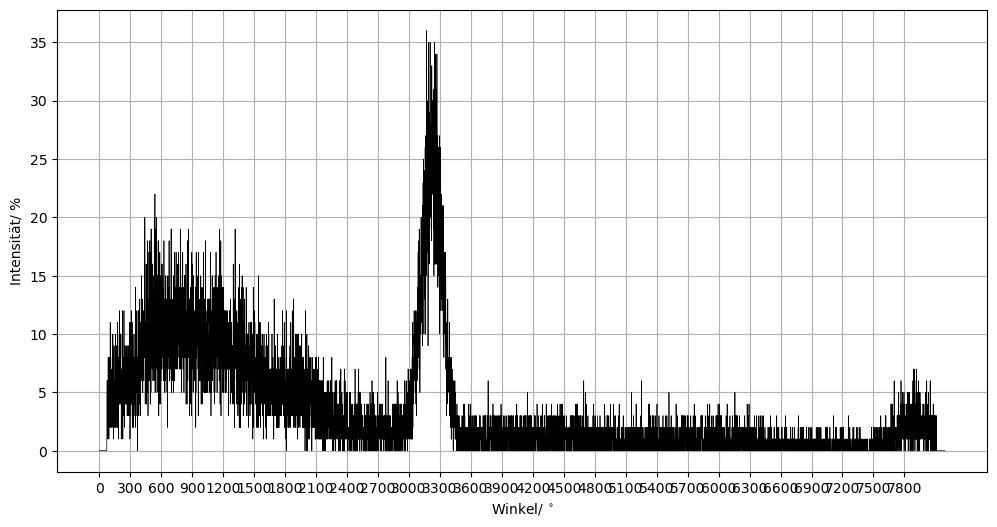

In [3]:
n1=np.loadtxt('./A107/1-r-na-nv.txt')
channel1=n1[:,0]
count1=n1[:,1]
plt.figure(figsize=(12,6))
#plt.title('baseline-fit und baseline substrahiertes Signal -'+str(titles[path]),fontsize=10)
#plt.plot(winkel[path],Intensity[path]-background,'b-',label='signal-baseline')
#plt.plot(winkel[path],background,'--',label='baseline-fit mit polynom grad 7')
#plt.axis([-3,3, -4, 90])
plt.plot(channel1,count1,'k', linewidth=0.5)
plt.xlabel('Winkel/ $^{\circ}$')
plt.ylabel('Intensität/ %')
plt.grid()
plt.xticks(np.arange(0, 8000, 300))
#plt.legend()
#plt.savefig('roh'+str(titles[path])+'.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

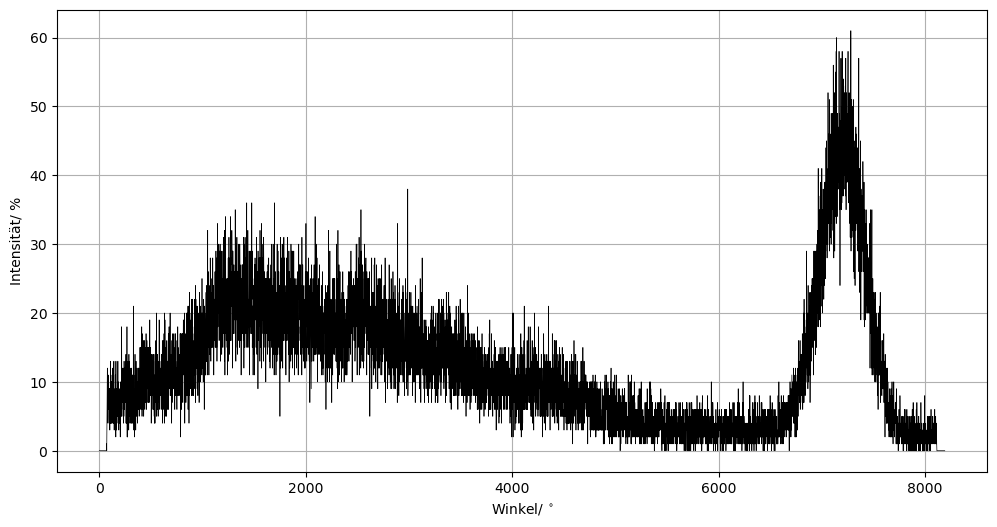

In [4]:
n1=np.loadtxt('./A107/1-rechts-na-2.txt')
channel1=n1[:,0]
count1=n1[:,1]
plt.figure(figsize=(12,6))
plt.plot(channel1,count1,'k', linewidth=0.5)
plt.xlabel('Winkel/ $^{\circ}$')
plt.ylabel('Intensität/ %')
plt.grid()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

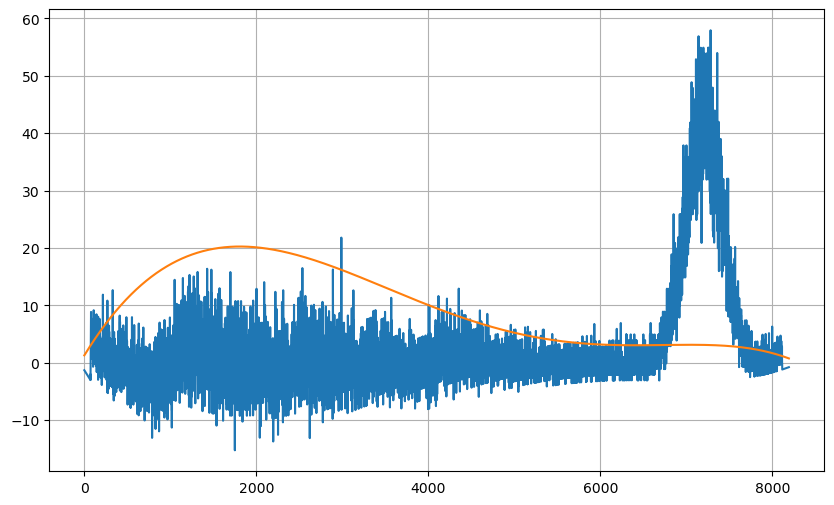

In [5]:
signal_range = [6000,8000]

x=channel1
y=count1
p_bg, out_bg, mod_bg = coarseBackgroundModel(x,y,5,signal_range)
background = mod_bg.eval(p_bg,x=x)
# background_2 = background[mask2]
# and plot the result
plt.figure(figsize=(10, 6))
plt.plot(x,y-background)
plt.plot(x,background)
#plt.xticks(np.arange(-350, max(x)+1, 50.0))
plt.grid()
plt.show

[[Model]]
    Model(gaussian, prefix='g1_')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 99
    # data points      = 8192
    # variables        = 3
    chi-square         = 112785.579
    reduced chi-square = 13.7728146
    Akaike info crit   = 21488.1308
    Bayesian info crit = 21509.1635
    R-squared          = 0.84122514
[[Variables]]
    g1_amplitude:  22339.7967 +/- 125.199201 (0.56%) (init = 0.016)
    g1_center:     7201.42602 +/- 1.38507534 (0.02%) (init = 90)
    g1_sigma:      214.034358 +/- 1.38508925 (0.65%) (init = 14)
    g1_fwhm:       504.012388 +/- 3.26163587 (0.65%) == '2.3548200*g1_sigma'
    g1_height:     41.6395291 +/- 0.23336107 (0.56%) == '0.3989423*g1_amplitude/max(1e-15, g1_sigma)'
[[Correlations]] (unreported correlations are < 0.500)
    C(g1_amplitude, g1_sigma) = +0.5774


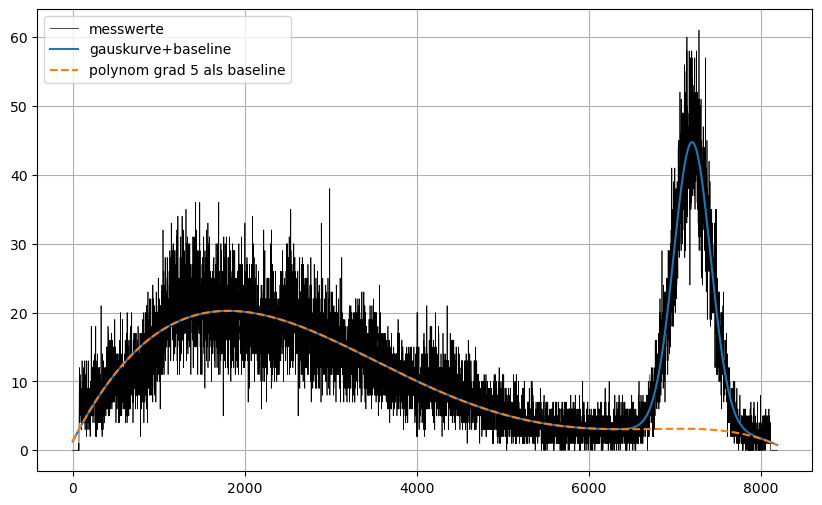

In [6]:
x1 = x
y1 = y-background
model = (GaussianModel(prefix='g1_'))
params = model.make_params(g1_amplitude=0.016,
                           g1_center=90,
                           g1_sigma=14)
result = model.fit(y1, params, x=x1)
print(result.fit_report(min_correl=0.5))
comps = result.eval_components(x=x1)
dely = result.eval_uncertainty(sigma=3)
ergebniss = model.eval(params,x=x1)
gaus_points=result.best_fit
lolo1=[]
lala1=[]
for name,param in result.params.items():
    if result.errorbars==True:
        lala1.append(param.stderr)
    else:
        lala1.append(0)
    lolo1.append(param.value)
plt.figure(figsize=(10, 6))
plt.plot(x,y,'k', linewidth=0.5,label='messwerte')
plt.plot(x,gaus_points+background,label='gauskurve+baseline')
plt.plot(x,background,'--',label='polynom grad 5 als baseline')
#plt.xticks(np.arange(-350, max(x)+1, 50.0))
plt.grid()
plt.legend()
plt.show
with open('fitparameter_na_rechts'+'.txt','w') as f:
    for name in result.best_values:
        f.write(str(name)+'\t'+str(np.round(result.best_values[name],4))+'\n')

<function matplotlib.pyplot.show(close=None, block=None)>

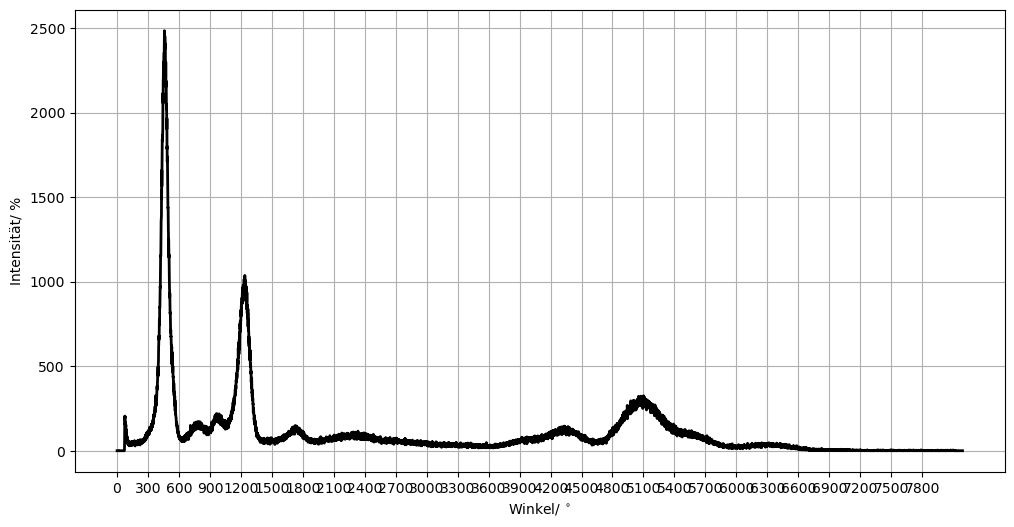

In [7]:
n1=np.loadtxt('./A107/1-rechts-ba.txt')
channel1=n1[:,0]
count1=n1[:,1]
plt.figure(figsize=(12,6))
plt.plot(channel1,count1,'k', linewidth=2)
plt.xlabel('Winkel/ $^{\circ}$')
plt.ylabel('Intensität/ %')
plt.xticks(np.arange(0, 8000, 300))
plt.grid()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

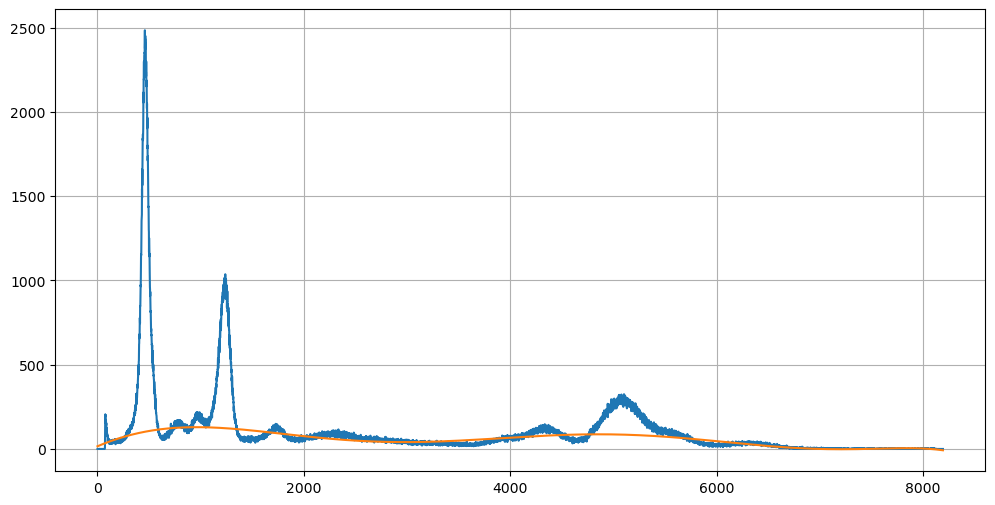

In [8]:
signal_range = [200,650,1050,1400,4600,5500]

x=channel1
y=count1
p_bg, out_bg, mod_bg = coarseBackgroundModel2(x,y,7,signal_range)
background = mod_bg.eval(p_bg,x=x)
# background_2 = background[mask2]
# and plot the result
plt.figure(figsize=(12, 6))
plt.plot(x,y)
plt.plot(x,background)
#plt.xticks(np.arange(-350, max(x)+1, 50.0))
plt.grid()
plt.show



[[Model]]
    ((Model(gaussian, prefix='g1_') + Model(gaussian, prefix='g2_')) + Model(gaussian, prefix='g3_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 219
    # data points      = 8192
    # variables        = 9
    chi-square         = 6354267.09
    reduced chi-square = 776.520481
    Akaike info crit   = 54525.3052
    Bayesian info crit = 54588.4034
    R-squared          = 0.98234541
[[Variables]]
    g1_amplitude:  191935.770 +/- 380.427456 (0.20%) (init = 2000)
    g1_center:     462.544119 +/- 0.08022011 (0.02%) (init = 500)
    g1_sigma:      35.0507106 +/- 0.08021928 (0.23%) (init = 14)
    g2_amplitude:  104804.342 +/- 451.649135 (0.43%) (init = 1000)
    g2_center:     1230.21896 +/- 0.24583359 (0.02%) (init = 1200)
    g2_sigma:      49.4027432 +/- 0.24583610 (0.50%) (init = 14)
    g3_amplitude:  81886.1736 +/- 809.517405 (0.99%) (init = 1300)
    g3_center:     5099.87888 +/- 1.81165949 (0.04%) (init = 5000)
    g3_sigma:      158.69

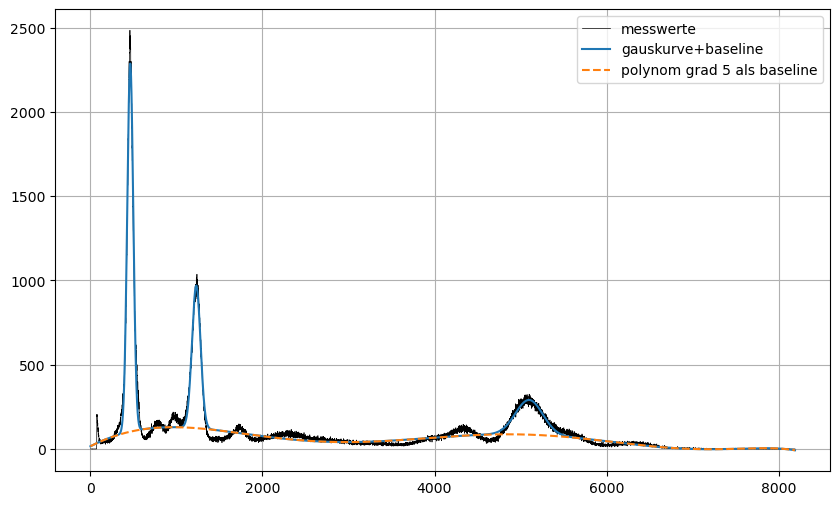

In [9]:
x1 = x
y1 = y-background
lolo=[]
lala=[]
model = (GaussianModel(prefix='g1_') +
        GaussianModel(prefix='g2_') +
        GaussianModel(prefix='g3_'))
params = model.make_params(g1_amplitude=2000,
                           g1_center=500,
                           g1_sigma=14,
                           g2_amplitude=1000,
                           g2_center=1200,
                           g2_sigma=14,
                           g3_amplitude=1300,
                           g3_center=5000,
                           g3_sigma=100)
result = model.fit(y1, params, x=x1)
print(result.fit_report(min_correl=0.5))
comps = result.eval_components(x=x1)
dely = result.eval_uncertainty(sigma=3)
ergebniss = model.eval(params,x=x1)
gaus_points=result.best_fit
for name,param in result.params.items():
    if result.errorbars==True:
        lala.append(param.stderr)
    else:
        lala.append(0)
    lolo.append(param.value)

plt.figure(figsize=(10, 6))
plt.plot(x,y,'k', linewidth=0.5,label='messwerte')
plt.plot(x,gaus_points+background,label='gauskurve+baseline')
plt.plot(x,background,'--',label='polynom grad 5 als baseline')
#plt.xticks(np.arange(-350, max(x)+1, 50.0))
plt.grid()
plt.legend()
plt.show
with open('fitparameter_ba_rechts'+'.txt','w') as f:
    for name in result.best_values:
        f.write(str(name)+'\t'+str(np.round(result.best_values[name],4))+'\n')
print(lolo)

In [10]:
centers=[]
center_err=[]
energies=[31,81,356,511]
Er=[0,0,0,0]
indices=[1,4,7]

for i in indices:
    centers.append(lolo[i])
    center_err.append(lolo[i+1])
centers.append(lolo1[1])
center_err.append(lolo1[2])
print(centers)


[462.5441190821375, 1230.218958136751, 5099.878879652426, 7201.426017749657]


Durch die Anpassung bestimmte Parameter: [66.26383338 14.02350627] +/- [39.50226822  0.12564502] nm


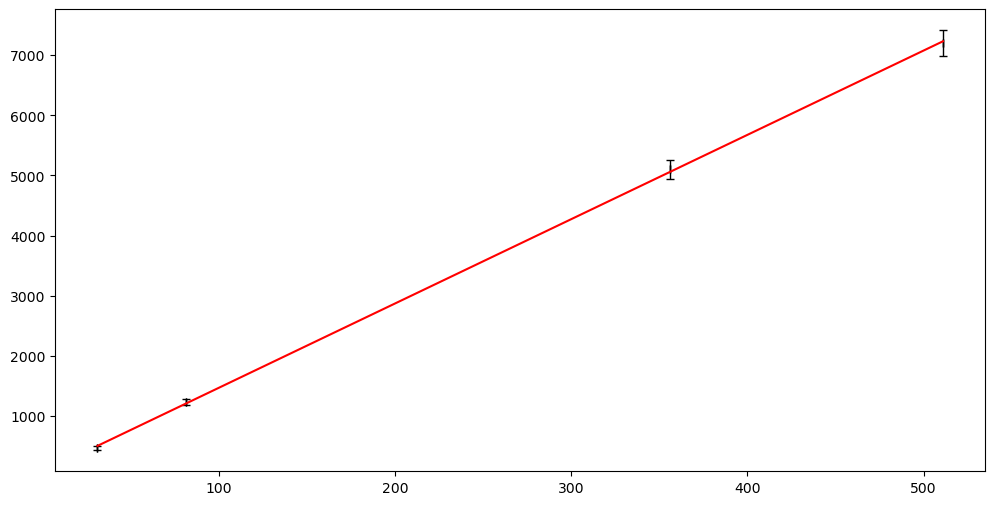

In [11]:
Er=[0,0,0,0]
sigmas=center_err
s=[]
anpassungs_werte, co_var = curve_fit(funktion, energies,centers)
perr= np.sqrt(np.diag(co_var))
print("Durch die Anpassung bestimmte Parameter:", anpassungs_werte, "+/-", perr, "nm")
#Rfit    = funktion(U2[h], *anpassungs_werte)
Rfit=[]
for E in energies:
    Rfit.append(funktion(E, *anpassungs_werte))

plt.figure(figsize=(12,6))
plt.errorbar(energies,centers,sigmas,Er,'k.',capsize=3,elinewidth=1,markersize=0,label='data')
#plt.plot(U2[h],,'r x',markersize=5)
plt.plot(energies,Rfit,'r',label='Anpassungsgerade')

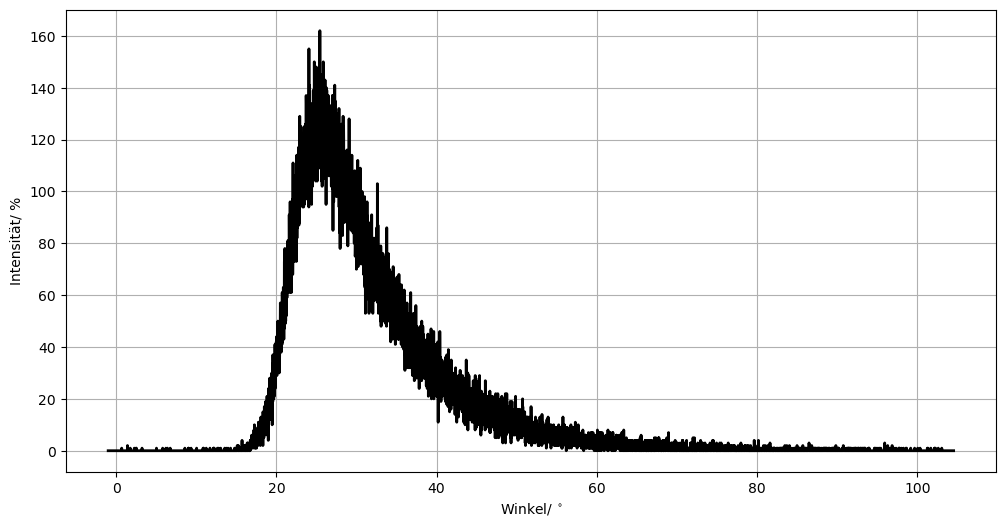

In [20]:
n1=np.loadtxt('./A107/Lebensdauer.txt')
x=0.01288457*n1[:,0]-0.99977631
y=n1[:,1]
plt.figure(figsize=(12,6))
plt.plot(x,y,'k', linewidth=2)
plt.xlabel('Winkel/ $^{\circ}$')
plt.ylabel('Intensität/ %')
#plt.xticks(np.arange(0, 8000, 300))
plt.grid()
plt.show

def funk(x,A,t,mu,sigma):
    y1 = A/t*np.exp(-(x-16)/t)
    y2 = 1/(sigma*np.sqrt(np.pi*2))*np.exp(-0.5*(x-mu)**2/sigma**2)
    return scs.convolve(y1,y2, 'same')/ sum(y2)

Durch die Anpassung bestimmte Parameter: [303.29007791   9.33089485  74.82210936  -2.41787445] +/- [2.37218272 0.03407025 0.01109707 0.01309732] nm


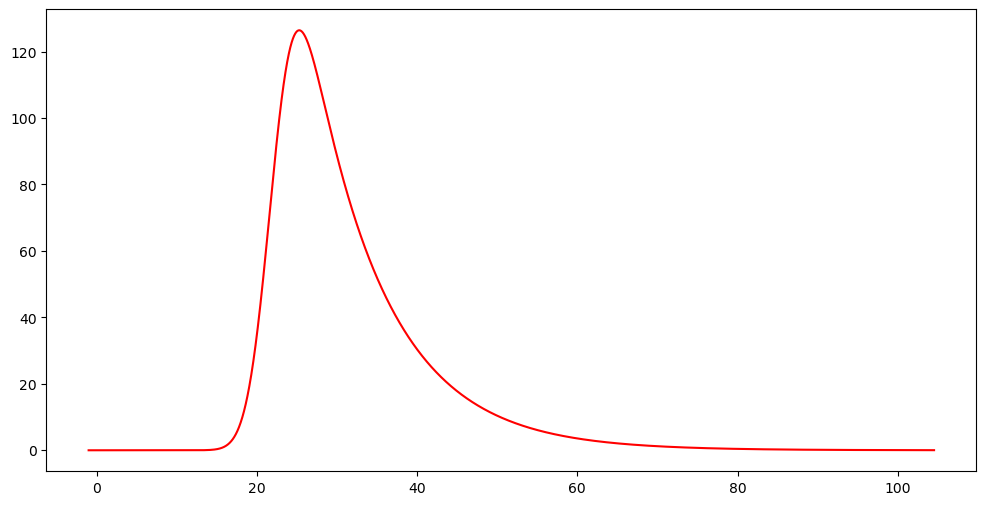

In [21]:
s=[]
anpassungs_werte, co_var = curve_fit(funk,x,y)
perr= np.sqrt(np.diag(co_var))
print("Durch die Anpassung bestimmte Parameter:", anpassungs_werte, "+/-", perr, "nm")
Rfit    = funk(x, *anpassungs_werte)
#Rfit=[]
#for E in x:
#    Rfit.append(funk(E, *anpassungs_werte))

plt.figure(figsize=(12,6))
#plt.errorbar(x,y,sigmas,Er,'k.',capsize=3,elinewidth=1,markersize=0,label='data')
#plt.plot(U2[h],,'r x',markersize=5)
plt.plot(x,Rfit,'r',label='Anpassungsgerade')

In [25]:
print(9.33089485*np.log(2))

6.467683457378814


/opt/conda/lib/python3.11/site-packages/uncertainties/core.py:170: RuntimeWarning: invalid value encountered in divide
  covariance_mat/norm_vector/norm_vector[:,numpy.newaxis],


[[Model]]
    (Model(jump) <function convolve at 0x7f67cfd9d300> Model(gaussian))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 8192
    # variables        = 5
    chi-square         = 11331598.0
    reduced chi-square = 1384.09649
    Akaike info crit   = 59256.1195
    Bayesian info crit = 59291.1740
    R-squared          = -0.29163518
[[Variables]]
    I:          100000.000 +/-        inf (inf%) (init = 100000)
    T:          6.00000000 +/-        inf (inf%) (init = 6)
    amplitude:  1.00000000 +/-        inf (inf%) (init = 1)
    center:     3.50000000 +/-        inf (inf%) (init = 3.5)
    sigma:      1.50000000 +/-        inf (inf%) (init = 1.5)


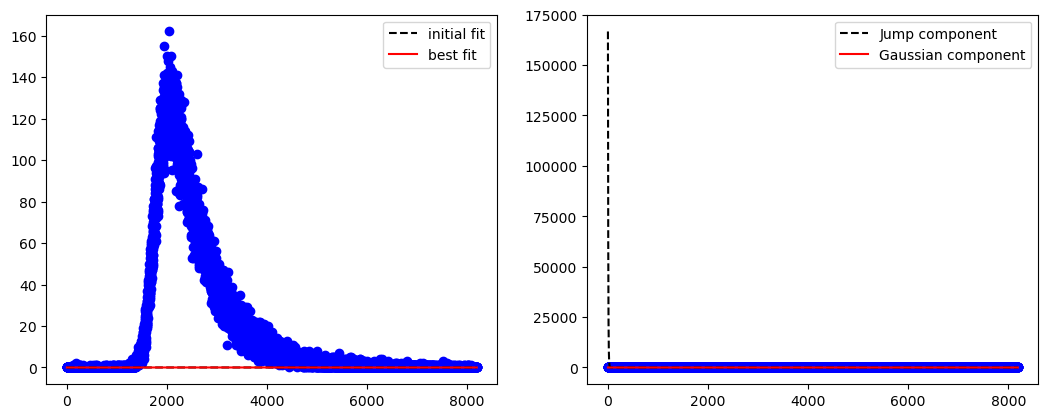

In [16]:
# <examples/doc_model_composite.py>
import matplotlib.pyplot as plt
import numpy as np

from lmfit import CompositeModel, Model
from lmfit.lineshapes import gaussian, step

# create data from broadened step
# x = np.linspace(0, 10, 201)
# y = step(x, amplitude=12.5, center=4.5, sigma=0.88, form='erf')
# np.random.seed(0)
# y = y + np.random.normal(scale=0.35, size=x.size)


def jump(x, I, T):
    o = I/T*np.exp(-(x)/T)
    return o


def convolve(arr, kernel):
    """Simple convolution of two arrays."""
    npts = min(arr.size, kernel.size)
    pad = np.ones(npts)
    tmp = np.concatenate((pad*arr[0], arr, pad*arr[-1]))
    out = np.convolve(tmp, kernel, mode='valid')
    noff = int((len(out) - npts) / 2)
    return out[noff:noff+npts]


# create Composite Model using the custom convolution operator
mod = CompositeModel(Model(jump), Model(gaussian), convolve)

# create parameters for model.  Note that 'mid' and 'center' will be highly
# correlated. Since 'mid' is used as an integer index, it will be very
# hard to fit, so we fix its value
pars = mod.make_params(amplitude=dict(value=1, min=0),
                       center=3.5,
                       sigma=dict(value=1.5, min=0),
                       I=100000,
                       T=6)

# fit this model to data array y
result = mod.fit(y, params=pars, x=x)

print(result.fit_report())

# generate components
comps = result.eval_components(x=x)

# plot results
fig, axes = plt.subplots(1, 2, figsize=(12.8, 4.8))

axes[0].plot(x, y, 'bo')
axes[0].plot(x, result.init_fit, 'k--', label='initial fit')
axes[0].plot(x, result.best_fit, 'r-', label='best fit')
axes[0].legend()

axes[1].plot(x, y, 'bo')
axes[1].plot(x, 10*comps['jump'], 'k--', label='Jump component')
axes[1].plot(x, 10*comps['gaussian'], 'r-', label='Gaussian component')
axes[1].legend()

plt.show()
# <end examples/doc_model_composite.py>